# MUSHROOM EDIBILITY PREDICTOR 

In [1]:
# IMPORTS

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
palette=sns.color_palette('Set2')

# 1. convertir csv en dataframe

mdata = pd.read_csv("../data/raw/mushroom_data.csv", sep=';')
mdata.shape

(61069, 21)

In [2]:
# 2. EDA
# 2.1 borrar duplicados

smdata = mdata.drop_duplicates()  
smdata.shape

# eliminamos duplicados: de 61069 a 60923 = 146 duplicados

(60923, 21)

In [3]:
# 2.2 obtener info sobre la DF y valores nulos

smdata.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color            74

In [4]:
# 2.3 analisis descriptivo: 

smdata.describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


/tmp/ipykernel_4647/3722203851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=smdata, palette=['blue', 'orange'])


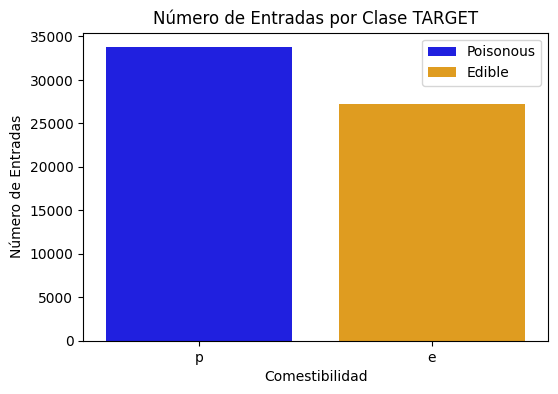

In [5]:
# Crear un gráfico de barras para contar el numero de casos para cada valñor de la CLASE TARGET

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=smdata, palette=['blue', 'orange'])
plt.title('Número de Entradas por Clase TARGET')
plt.legend(labels=["Poisonous","Edible"])
plt.xlabel('Comestibilidad')
plt.ylabel('Número de Entradas')
plt.show()

In [6]:
# Obtener los nombres de las columnas como un Index
column_names_index = smdata.columns
print("Column names as Index:")
print(column_names_index)


Column names as Index:
Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


In [7]:
smdata.head(-20)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61044,p,1.34,x,s,y,f,f,f,f,4.01,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61045,p,1.16,f,s,y,f,f,f,f,3.36,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61046,p,1.20,s,s,y,f,f,f,f,3.61,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61047,p,1.26,f,s,y,f,f,f,f,3.43,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


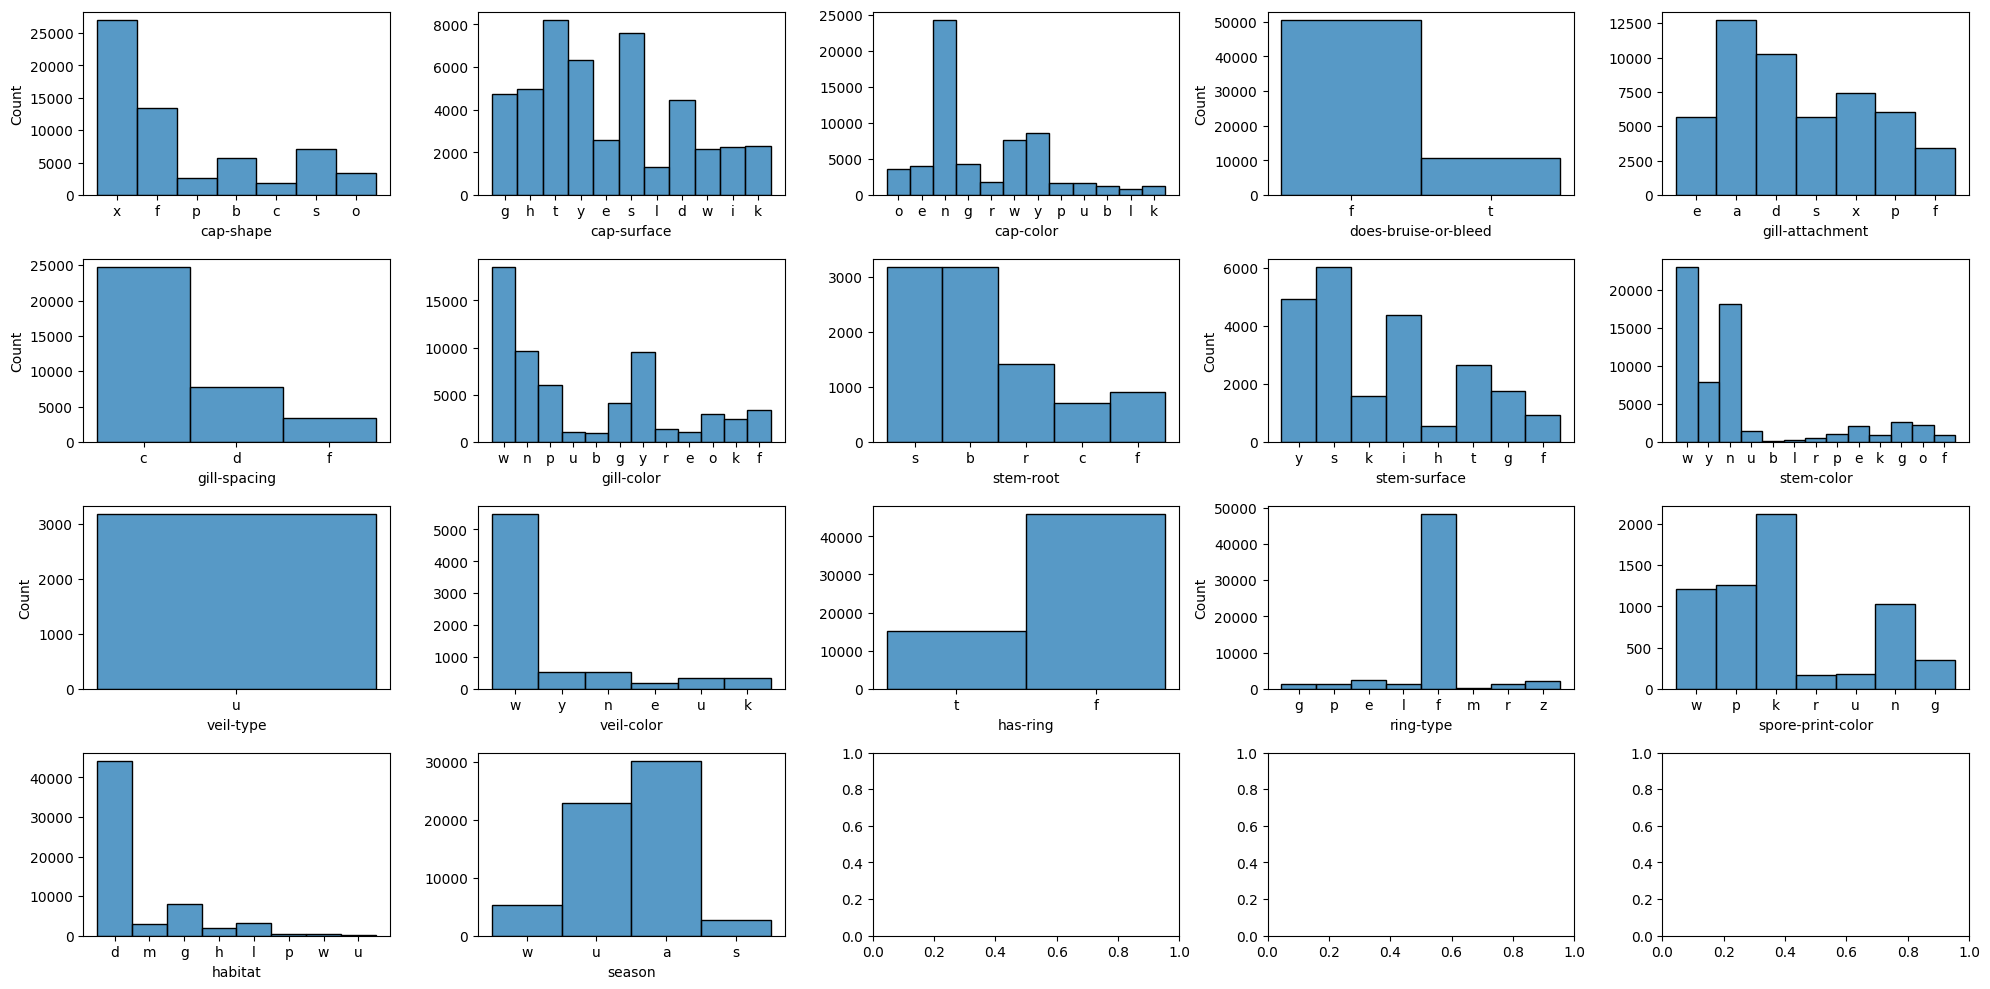

In [8]:
# graficar las variables categoricas en histogramas

fig, axis = plt.subplots(4, 5, figsize = (20, 10))

# Create a multiple histogram

sns.histplot(ax = axis[0, 0], data = smdata, x = 'cap-shape')
sns.histplot(ax = axis[0, 1], data = smdata, x = 'cap-surface').set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = smdata, x = 'cap-color').set(ylabel = None)
sns.histplot(ax = axis[0, 3], data = smdata, x = 'does-bruise-or-bleed')
sns.histplot(ax = axis[0, 4], data = smdata, x = 'gill-attachment').set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = smdata, x = 'gill-spacing')
sns.histplot(ax = axis[1, 1], data = smdata, x = 'gill-color').set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = smdata, x = 'stem-root').set(ylabel = None)
sns.histplot(ax = axis[1, 3], data = smdata, x = 'stem-surface')
sns.histplot(ax = axis[1, 4], data = smdata, x = 'stem-color').set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = smdata, x = 'veil-type')
sns.histplot(ax = axis[2, 1], data = smdata, x = 'veil-color').set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = smdata, x = 'has-ring').set(ylabel = None)
sns.histplot(ax = axis[2, 3], data = smdata, x = 'ring-type')
sns.histplot(ax = axis[2, 4], data = smdata, x = 'spore-print-color').set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = smdata, x = 'habitat').set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = smdata, x = 'season').set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# conclusiones del histograma 
# la variable "veil-type", ademas de tener solo 3177 non-null, tiene todos sus valores iguales (u=universal), con lo cual podemos eliminarla

if 'veil-type' in smdata.columns:
    smdata.drop(['veil-type'], axis=1, inplace=True)

smdata.info()
# columna "veil-type" eliminada


<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-color            7413 non-null   object 
 15  has-ring              60

/tmp/ipykernel_4647/1399253063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdata.drop(['veil-type'], axis=1, inplace=True)


In [10]:
# la variable "ring-type" tiene uno de sus valor practicamente dominando la grafica, 
# contamos la frecuencia de valores en la columna 'ring-type' por si se pudiese eliminar 

ring_type_counts = smdata['ring-type'].value_counts()
print("\nFrecuencia de valores en 'ring-type':")
print(ring_type_counts)


# De 60903 valores, 48215 son f=none. Es decir, que solo en un 20% de los casos existe un "ring".  


Frecuencia de valores en 'ring-type':
ring-type
f    48215
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64


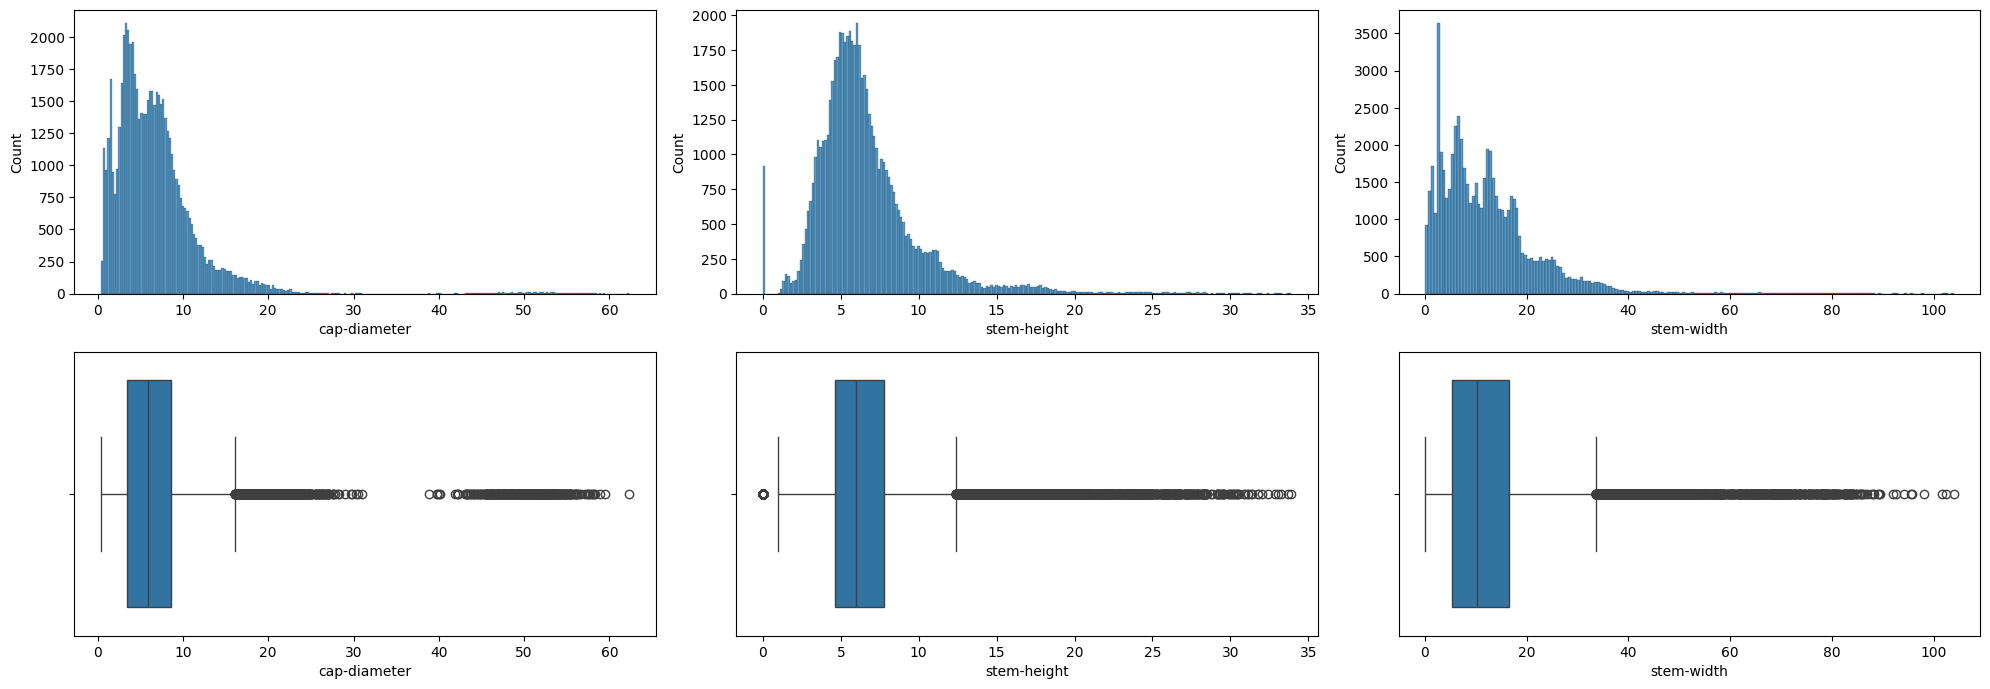

In [11]:
# 2.3 ANALISIS DE VARIABLES NUMERICAS

fig, axis = plt.subplots(2, 3, figsize = (20, 7))

# Creating a multiple figure with histograms

sns.histplot(ax = axis[0, 0], data = smdata, x = "cap-diameter")
sns.histplot(ax = axis[0, 1], data = smdata, x = "stem-height")
sns.histplot(ax = axis[0, 2], data = smdata, x = "stem-width")
sns.boxplot(ax = axis[1, 0], data = smdata, x = "cap-diameter")
sns.boxplot(ax = axis[1, 1], data = smdata, x = "stem-height")
sns.boxplot(ax = axis[1, 2], data = smdata, x = "stem-width")
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Las 3 variables numericas tienen un numero importante de outliers. Dado el caracter de los datos y el alto numero de variables que participan, lo mas logico serian mantener los outliers. 

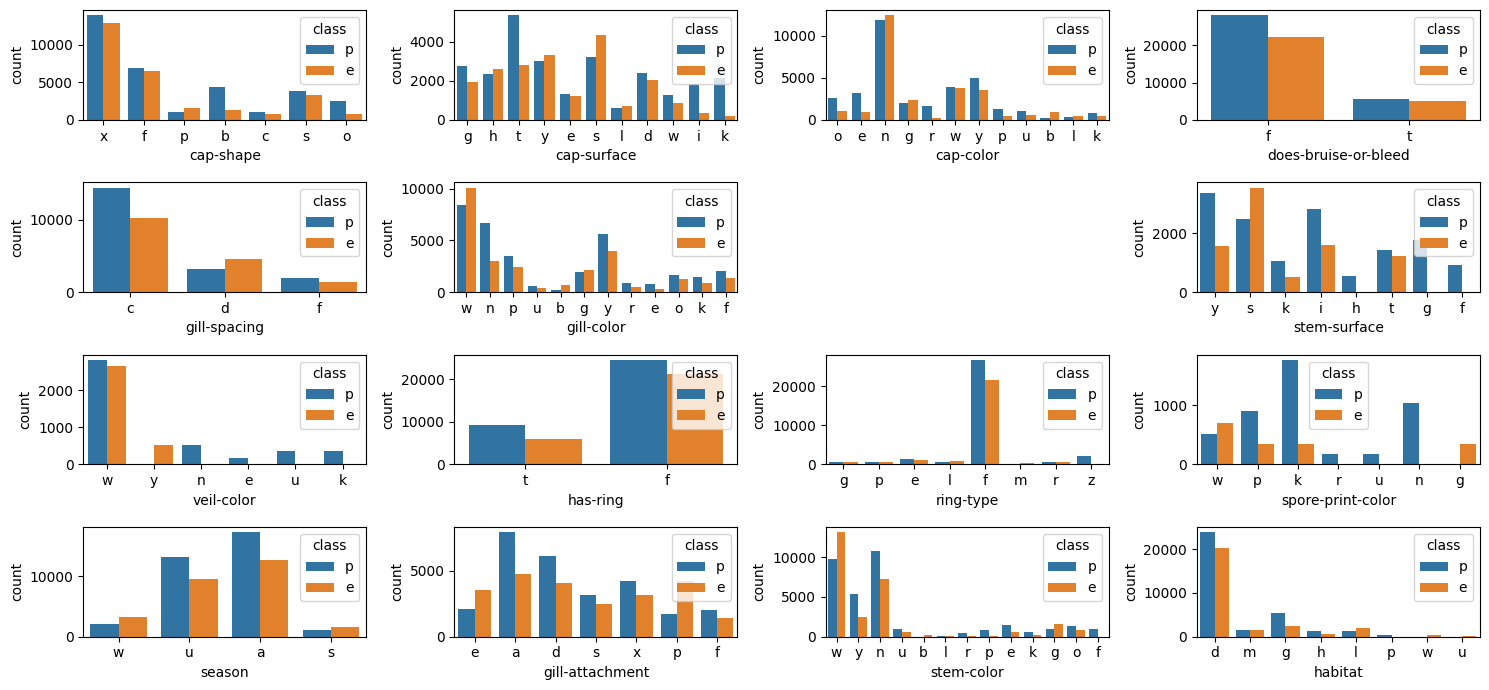

In [12]:
# ANALISIS DE VARIABLÑES CATEGORICAS VS CATEGORICAS

fig, axis = plt.subplots(4, 4, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = smdata, x = 'cap-shape', hue = "class")
sns.countplot(ax = axis[0, 1], data = smdata, x = 'cap-surface', hue = "class")
sns.countplot(ax = axis[0, 2], data = smdata, x = 'cap-color', hue = "class")
sns.countplot(ax = axis[0, 3], data = smdata, x = 'does-bruise-or-bleed', hue = "class")
sns.countplot(ax = axis[1, 0], data = smdata, x = 'gill-spacing', hue = "class")
sns.countplot(ax = axis[1, 1], data = smdata, x = 'gill-color', hue = "class")
sns.countplot(ax = axis[1, 2], data = smdata, x = 'stem-root', hue = "class")
sns.countplot(ax = axis[1, 3], data = smdata, x = 'stem-surface', hue = "class")
sns.countplot(ax = axis[2, 0], data = smdata, x = 'veil-color', hue = "class")
sns.countplot(ax = axis[2, 1], data = smdata, x = 'has-ring', hue = "class")
sns.countplot(ax = axis[2, 2], data = smdata, x = 'ring-type', hue = "class")
sns.countplot(ax = axis[2, 3], data = smdata, x = 'spore-print-color', hue = "class")
sns.countplot(ax = axis[3, 0], data = smdata, x = 'season', hue = "class")
sns.countplot(ax = axis[3, 1], data = smdata, x = 'gill-attachment', hue = "class")
sns.countplot(ax = axis[3, 2], data = smdata, x = 'stem-color', hue = "class")
sns.countplot(ax = axis[3, 3], data = smdata, x = 'habitat', hue = "class")

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

conclusion: ninguna de las caracteristicas por si misma parece determinante de la clase, pero algunoos valores parecen ser mayor factor de determinacion que otros, debido al mayor numero de casos. Ejemplo: ring-type=f; habitat=t; veil-color=w; cap-color=n;  
Los datos apuntan a que la determinacion proceda de combinaciones de distintas variables con ciertos valores.

Por ejemplo; la combinacion: spore-print-color=k/n + cap-surface=t + stem-surface=y tiene una alta probabilidad de ser venenosa (p)

In [13]:
# ANALISIS DE CORRELACION ENTRE VARIABLES CATEGORICAS binarias y numericas

# factorizamos variables categoricas binarias (para las multiples usaremos one-hot-encoding)

smdata["class"] = pd.factorize(smdata["class"])[0]
smdata["does-bruise-or-bleed"] = pd.factorize(smdata["does-bruise-or-bleed"])[0]
smdata["has-ring"] = pd.factorize(smdata["has-ring"])[0]


# var_categoricas = ['cap-shape', 'cap-surface', 'cap-color',
#        'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
#        'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
#        'habitat', 'season']       


/tmp/ipykernel_4647/547900149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdata["class"] = pd.factorize(smdata["class"])[0]
/tmp/ipykernel_4647/547900149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smdata["does-bruise-or-bleed"] = pd.factorize(smdata["does-bruise-or-bleed"])[0]
/tmp/ipykernel_4647/547900149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

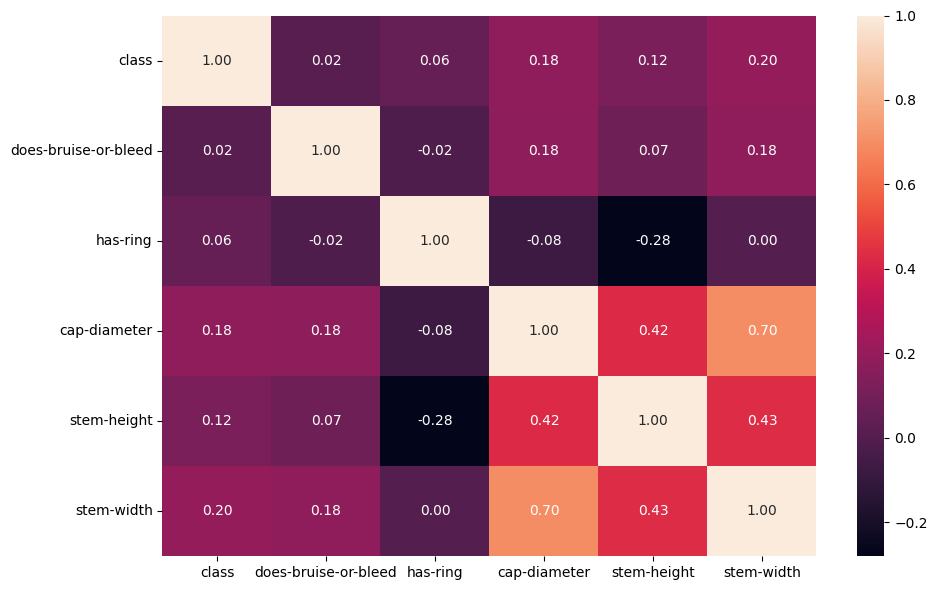

In [14]:
# analisis de correlacion 

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(smdata[["class", "does-bruise-or-bleed", "has-ring", "cap-diameter", "stem-height", "stem-width"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

En esta primera matriz de correlacion se puede ver que hay variables que tiene un impacto de practicamente cero sobre la clase target. Por tanto, vamos a eliminarlas de los datos de entrenamiento.
- 'does-bruise-or-bleed' tiene un indice de correlacion de 0.02  
- 'has-ring' tiene un indice de correlacion de 0.06
- 'ring-type' es dependiente de 'has-ring' y ya vimos en el anterior analisis que tiene un valor = falso en el 80% de los casos 

In [15]:
# eliminamos las tres variables con menor impacto 

smdata_dis = smdata.drop(['does-bruise-or-bleed', 'has-ring', 'ring-type'], axis=1)
smdata_dis.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              60923 non-null  int64  
 1   cap-diameter       60923 non-null  float64
 2   cap-shape          60923 non-null  object 
 3   cap-surface        46803 non-null  object 
 4   cap-color          60923 non-null  object 
 5   gill-attachment    51068 non-null  object 
 6   gill-spacing       35861 non-null  object 
 7   gill-color         60923 non-null  object 
 8   stem-height        60923 non-null  float64
 9   stem-width         60923 non-null  float64
 10  stem-root          9387 non-null   object 
 11  stem-surface       22801 non-null  object 
 12  stem-color         60923 non-null  object 
 13  veil-color         7413 non-null   object 
 14  spore-print-color  6326 non-null   object 
 15  habitat            60923 non-null  object 
 16  season             60923 no

In [16]:
# INGENIERIA DE CARACTERISTICAS
# 3.2 TRANSFORMAR VARIABLES CATEGORICAS A NUMERICAS CON LABEL-ENCODING

from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame original para mantener los datos originales
smdata_dis_encoded = smdata_dis.copy()

# Columnas categóricas a codificar
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','gill-attachment', 'gill-spacing', 'gill-color','stem-root', 'stem-surface', 'stem-color', 'veil-color','spore-print-color', 'habitat', 'season']

# Crear un diccionario para almacenar los LabelEncoders
label_encoders = {}

# Aplicar Label Encoding a cada columna categórica
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    smdata_dis_encoded[column] = label_encoders[column].fit_transform(smdata_dis[column])

# Mostrar el DataFrame después de Label Encoding
print("\nDataFrame después de Label Encoding:")
print(smdata_dis_encoded)


# PARA REVERTIR la codificación de una columna (GENERICO)

# df_decoded = df_encoded.copy()
# for column in categorical_columns:
#     df_decoded[column] = label_encoders[column].inverse_transform(df_encoded[column])

# # Mostrar el DataFrame después de revertir la codificación
# print("\nDataFrame después de revertir la codificación:")
# print(df_decoded)


DataFrame después de Label Encoding:
       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0         15.26          6            2          6   
1          0         16.60          6            2          6   
2          0         14.07          6            2          6   
3          0         14.17          2            3          1   
4          0         14.64          6            3          6   
...      ...           ...        ...          ...        ...   
61064      0          1.18          5            7         11   
61065      0          1.27          2            7         11   
61066      0          1.27          5            7         11   
61067      0          1.24          2            7         11   
61068      0          1.17          5            7         11   

       gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0                    2             3          10        16.95       17.09   
1                    2     

In [17]:

# 3.2 reemplazamos los NAN con valor 0

#columnas donde hay que reemplazar los nan con 0
variables_cat_con_nan = ['cap-surface' , 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-color', 'spore-print-color']

# Reemplazar los NaN en las columnas especificadas con un valor, por ejemplo, 0
smdata_dis_encoded[variables_cat_con_nan] = smdata_dis_encoded[variables_cat_con_nan].fillna(0)

# # comprobamos los NAN dpesues del reemplazo 

smdata_dis_encoded.info() 



# RESULTADO: todos los valores Nan reemplazados por 0. Estos valores significaban que la caracteristica determinada no existia (era "false") y reemplazarlos 
# por 0 tiene sentido porque mas delante con label-encoding los valores 0 en cada caracteristica equivaldran a "false"

<class 'pandas.core.frame.DataFrame'>
Index: 60923 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   class              60923 non-null  int64  
 1   cap-diameter       60923 non-null  float64
 2   cap-shape          60923 non-null  int64  
 3   cap-surface        60923 non-null  int64  
 4   cap-color          60923 non-null  int64  
 5   gill-attachment    60923 non-null  int64  
 6   gill-spacing       60923 non-null  int64  
 7   gill-color         60923 non-null  int64  
 8   stem-height        60923 non-null  float64
 9   stem-width         60923 non-null  float64
 10  stem-root          60923 non-null  int64  
 11  stem-surface       60923 non-null  int64  
 12  stem-color         60923 non-null  int64  
 13  veil-color         60923 non-null  int64  
 14  spore-print-color  60923 non-null  int64  
 15  habitat            60923 non-null  int64  
 16  season             60923 no

In [18]:
# guardar el dataframe en SQL 

import sqlite3

# Crear una conexión a una base de datos SQLite
conn = sqlite3.connect('finalpro.db')

# Convertir el DataFrame a una tabla SQL
smdata_dis_encoded.to_sql('mushrooms', conn, if_exists='replace', index=False)

# Consultar la DB para ver que los datos se han insertado correctamente
query_result = pd.read_sql('SELECT * FROM mushrooms', conn)
print("\nDatos en la tabla SQL 'mushrooms':")
print(query_result)

# Cerrar la conexión
conn.close()


Datos en la tabla SQL 'mushrooms':
       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0         15.26          6            2          6   
1          0         16.60          6            2          6   
2          0         14.07          6            2          6   
3          0         14.17          2            3          1   
4          0         14.64          6            3          6   
...      ...           ...        ...          ...        ...   
60918      0          1.18          5            7         11   
60919      0          1.27          2            7         11   
60920      0          1.27          5            7         11   
60921      0          1.24          2            7         11   
60922      0          1.17          5            7         11   

       gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0                    2             3          10        16.95       17.09   
1                    2       

In [19]:
# SPLIT TRAIN Y TEST DATA 

from sklearn.model_selection import train_test_split

X = smdata_dis_encoded.drop('class' , axis=1)
y = smdata_dis_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()



,cap-diameter,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,spore-print-color,habitat,season
8113,4.93,2,0,0,6,0,10,5.89,3.71,0,5,6,6,7,3,0
4193,3.93,6,10,5,0,3,10,5.81,3.54,5,7,6,6,7,0,2
53184,6.59,6,8,5,4,1,11,6.04,12.49,5,5,6,6,7,2,2
21430,3.44,6,8,5,1,3,6,5.28,5.72,5,6,11,6,7,0,0
43191,7.48,6,10,10,7,3,3,8.49,14.95,4,8,11,6,7,0,2


In [20]:
#  Escalado a los Datos de Entrenamiento y test

from sklearn.preprocessing import MinMaxScaler

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalado solo en los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar el mismo escalado a los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados de vuelta a DataFrames 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Mostrar los datos escalados
print("\nDatos de entrenamiento escalados:")
print(X_train_scaled)
print("\nDatos de prueba escalados:")
print(X_test_scaled)


Datos de entrenamiento escalados:
       cap-diameter  cap-shape  cap-surface  cap-color  gill-attachment  \
0          0.073434   0.333333     0.000000   0.000000         0.857143   
1          0.057295   1.000000     0.909091   0.454545         0.000000   
2          0.100226   1.000000     0.727273   0.454545         0.571429   
3          0.049387   1.000000     0.727273   0.454545         0.142857   
4          0.114590   1.000000     0.909091   0.909091         1.000000   
...             ...        ...          ...        ...              ...   
48733      0.049548   0.833333     0.000000   0.545455         0.142857   
48734      0.132505   1.000000     0.090909   0.454545         0.000000   
48735      0.192059   0.333333     1.000000   0.454545         0.285714   
48736      0.081343   1.000000     0.636364   0.181818         0.714286   
48737      0.137508   0.500000     0.727273   0.545455         1.000000   

       gill-spacing  gill-color  stem-height  stem-width  stem-r

In [21]:
# SELECCION DE CARACTERISTICAS

from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 10 eliminamos 6 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 10)
selection_model.fit(X_train_scaled, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test_scaled.columns.values[ix])

X_train_sel.head()


,cap-diameter,cap-shape,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-color,spore-print-color,season
0,0.073434,0.333333,0.909091,0.173644,0.035704,0.625,0.500000,1.0,1.0,0.000000
1,0.057295,1.000000,0.909091,0.171285,0.034068,0.875,0.500000,1.0,1.0,0.666667
2,0.100226,1.000000,1.000000,0.178066,0.120200,0.625,0.500000,1.0,1.0,0.666667
3,0.049387,1.000000,0.545455,0.155660,0.055048,0.750,0.916667,1.0,1.0,0.000000
4,0.114590,1.000000,0.272727,0.250295,0.143875,1.000,0.916667,1.0,1.0,0.666667


In [22]:
# guardar train and test data en CSV

X_train_sel["class"] = list(y_train)
X_test_sel["class"] = list(y_test)

X_train_sel.to_csv("../data/processed/train_data.csv", index=False)
X_test_sel.to_csv("../data/processed/test_data.csv", index=False)